In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
pd.options.mode.chained_assignment = None  
from scipy import optimize,interpolate
import sklearn 
from sklearn.cluster import DBSCAN
%run Routines_and_data/extract_func_3D.py
%run Routines_and_data/gauss.py
%run Routines_and_data/gauss_asym.py
import scipy
from lmfit import Model
from mpl_point_clicker import clicker


/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=Tr

In [2]:
print(pd.__version__)

0.23.4


In [3]:
%matplotlib widget

## Property Data

In [4]:
df = pd.read_csv('data/data_rho.csv')

Xs    = df.x
Ys    = df.y
prop_final = df.rho_resta_final_exp

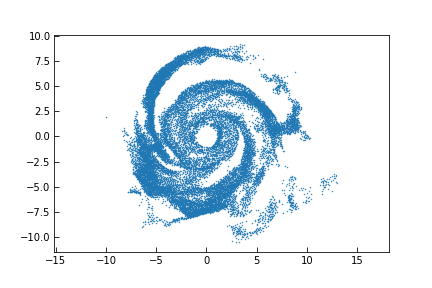

In [5]:
%matplotlib widget

import matplotlib as mpl
mpl.rcParams['text.usetex'] = False

# Graficar puntos
plt.scatter(Xs, Ys, s=0.2)

# Ajustar los ejes a la misma escala
plt.axis('equal')

plt.show()


In [6]:
b=0.4 #valor david b=0.4
min_prop  = np.min(prop_final[ np.absolute(Ys) < b])

Xs_band   = Xs[ (np.absolute(Ys) < b) ]
Ys_band   = Ys[ (np.absolute(Ys) < b) ]
prop_band = prop_final[ np.absolute(Ys) < b]-min_prop

In [7]:
prop_band

3        5.115457e-05
9        5.600193e-05
11       2.657228e-05
16       4.036918e-05
23       4.695620e-05
27       5.463010e-05
30       3.076149e-05
33       4.454749e-05
37       4.802335e-05
39       2.030011e-05
41       1.676295e-05
44       4.788538e-05
48       4.052888e-05
49       2.866081e-05
54       2.153860e-05
59       3.255810e-05
63       2.536056e-05
68       4.638639e-05
73       5.480814e-05
75       4.941668e-05
78       3.847669e-05
87       1.719649e-05
91       3.907220e-05
95       2.773887e-05
97       5.041866e-05
101      2.238870e-05
102      2.342471e-05
103      2.118979e-05
108      5.753832e-05
110      4.822427e-05
             ...     
16165    4.642246e-05
16172    2.378317e-05
16182    1.641484e-05
16195    9.258810e-06
16206    4.701520e-05
16230    5.934513e-07
16233    3.271643e-05
16234    4.678128e-05
16265    8.257092e-05
16266    7.491924e-05
16272    6.681383e-05
16274    9.897089e-06
16282    1.351651e-05
16285    5.339811e-05
16295    2

In [8]:
Xs_band

3         1.046754
9         1.083495
11        1.211977
16        1.049608
23        1.104243
27        1.064232
30        1.124527
33        1.147828
37        1.212377
39        1.199238
41        1.260976
44        0.992314
48        1.333319
49        1.114531
54        1.196808
59        1.233493
63        1.274591
68        1.164553
73        1.082667
75        1.047397
78       -1.126161
87        1.276711
91        1.369738
95        1.366889
97        1.192085
101       1.336953
102       1.243187
103       1.342580
108      -1.069890
110       1.344393
           ...    
16165     8.396679
16172     8.351545
16182     8.863294
16195     9.456886
16206     8.217167
16230     9.808455
16233     9.665421
16234     9.741461
16265     9.802875
16266     9.823259
16272     9.716186
16274     9.853842
16282     9.573780
16285     9.944780
16295     9.446305
16303     9.510982
16304     8.731975
16320    10.153568
16330     9.590327
16338     9.789788
16343    10.032102
16347     9.

In [9]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False


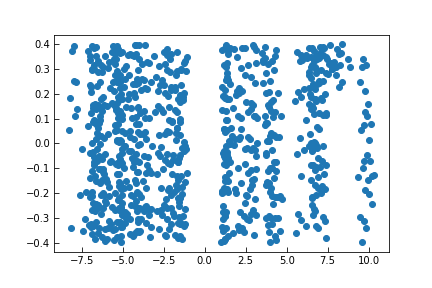

In [10]:
%matplotlib widget
plt.scatter(Xs_band, Ys_band,alpha=1);


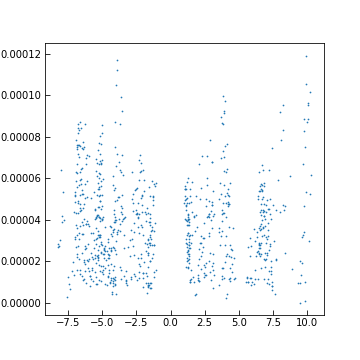

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Xs_band, prop_band,s=0.5,alpha=1)

#ax.set_xlim()

## Arm Tracing Points Data

In [12]:
samplig_freq=1
df_arm1 = pd.read_csv('data/arm_tracing_arm1_rho_dani.csv')
df_arm1['arm'] = [1]*len(df_arm1)
df_arm1['id'] = np.arange(0,len(df_arm1),1)
df_arm1 = df_arm1[::samplig_freq].reset_index(drop=True)

df_arm2 = pd.read_csv('data/arm_tracing_arm2_rho_dani.csv')
df_arm2['arm'] = [2]*len(df_arm2)
df_arm2['id'] = np.arange(0,len(df_arm2),1)
df_arm2 = df_arm2[::samplig_freq].reset_index(drop=True)

df_arms = pd.concat([df_arm1,df_arm2], axis = 0).reset_index(drop=True)

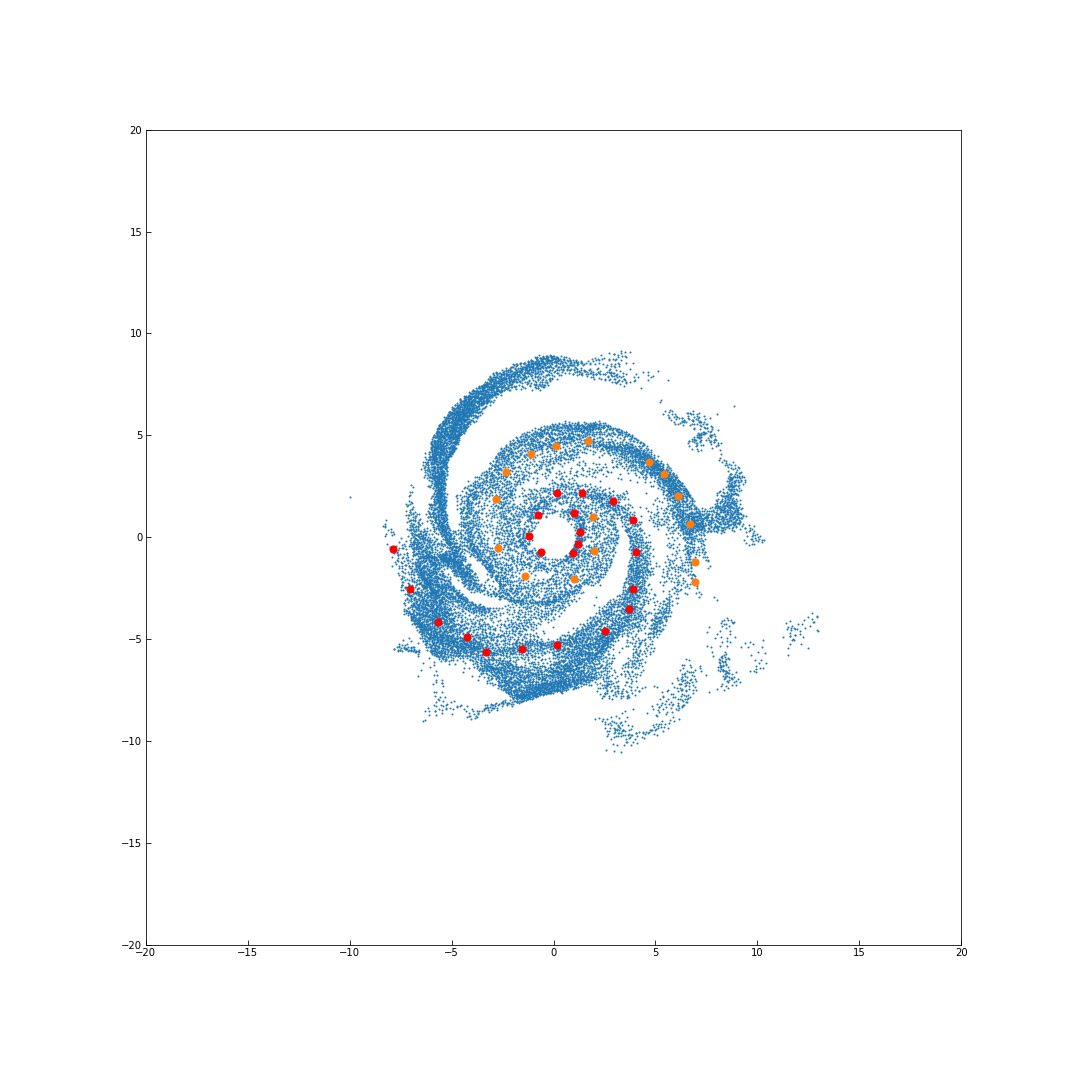

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(df.x, df.y, s = 1)
ax.scatter(df_arm1.x, df_arm1.y, s = 50, color = 'red')
ax.scatter(df_arm2.x, df_arm2.y, s = 50, color = 'C1')
R = 20
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)
ax.set_aspect('equal')

## Rotations

In [14]:
def rotate(x, y, radians):
    x_rot = x * np.cos(radians) + y * np.sin(radians)
    y_rot = -x * np.sin(radians) + y * np.cos(radians)
    return {'x_rot':x_rot,'y_rot':y_rot}

In [15]:
def get_rotations(df_data, x_rot, y_rot):
    Xs = df_data.x
    Ys = df_data.y
    
    if x_rot > 0 and y_rot > 0 :
        a = np.arctan(y_rot/x_rot)
        return rotate(Xs, Ys, a), a

    elif x_rot < 0 and y_rot > 0:
        a = np.arctan(y_rot/x_rot) + np.pi
        return rotate(Xs, Ys, a), a    
    
    elif x_rot < 0 and y_rot < 0:
        a = np.arctan(y_rot/x_rot) + np.pi
        return rotate(Xs, Ys, a), a   
    
    elif x_rot > 0 and y_rot < 0:
        a = np.arctan(y_rot/x_rot) + 2*np.pi
        return rotate(Xs, Ys, a), a 

In [16]:
def get_rotated_arm_profile(prop, rotation_coords, b):
    x_rot = rotation_coords['x_rot']
    y_rot = rotation_coords['y_rot']
    
    min_prop  = np.min(prop[ np.absolute(y_rot)<b] )
    x_band = x_rot[ (np.absolute(y_rot)<b) ]
    y_band = prop[ np.absolute(y_rot)<b] - min_prop
    
    return {'x_band':x_band,'y_band':y_band}

In [17]:
b = 0.3

In [18]:
df_arm1['rotation_info'] = df_arm1.apply(lambda row: get_rotations(df, row.x, row.y), axis = 1)
df_arm1['rotation_coords'] = df_arm1.apply(lambda row: row.rotation_info[0], axis = 1)
df_arm1['alpha'] = df_arm1.apply(lambda row: row.rotation_info[1], axis = 1)
df_arm1['All_tracingPoints_rot'] = df_arm1.apply(lambda row: rotate(df_arm1.x, df_arm1.y, row.alpha), axis = 1)
df_arm1['This_tracingPoint_rot'] = df_arm1.apply(lambda row: rotate(row.x, row.y, row.alpha), axis = 1)
df_arm1['rotated_arm_profile'] = df_arm1.apply(lambda row: get_rotated_arm_profile(prop_final, row.rotation_coords, b), axis = 1)


df_arm2['rotation_info'] = df_arm2.apply(lambda row: get_rotations(df, row.x, row.y), axis = 1)
df_arm2['rotation_coords'] = df_arm2.apply(lambda row: row.rotation_info[0], axis = 1)
df_arm2['alpha'] = df_arm2.apply(lambda row: row.rotation_info[1], axis = 1)
df_arm2['All_tracingPoints_rot'] = df_arm2.apply(lambda row: rotate(df_arm2.x, df_arm2.y, row.alpha), axis = 1)
df_arm2['This_tracingPoint_rot'] = df_arm2.apply(lambda row: rotate(row.x, row.y, row.alpha), axis = 1)
df_arm2['rotated_arm_profile'] = df_arm2.apply(lambda row: get_rotated_arm_profile(prop_final, row.rotation_coords, b), axis = 1)



df_arms['rotation_info'] = df_arms.apply(lambda row: get_rotations(df, row.x, row.y), axis = 1)
df_arms['rotation_coords'] = df_arms.apply(lambda row: row.rotation_info[0], axis = 1)
df_arms['alpha'] = df_arms.apply(lambda row: row.rotation_info[1], axis = 1)
df_arms['All_tracingPoints_rot'] = df_arms.apply(lambda row: rotate(df_arms.x, df_arms.y, row.alpha), axis = 1)
df_arms['This_tracingPoint_rot'] = df_arms.apply(lambda row: rotate(row.x, row.y, row.alpha), axis = 1)
df_arms['rotated_arm_profile'] = df_arms.apply(lambda row: get_rotated_arm_profile(prop_final, row.rotation_coords, b), axis = 1)

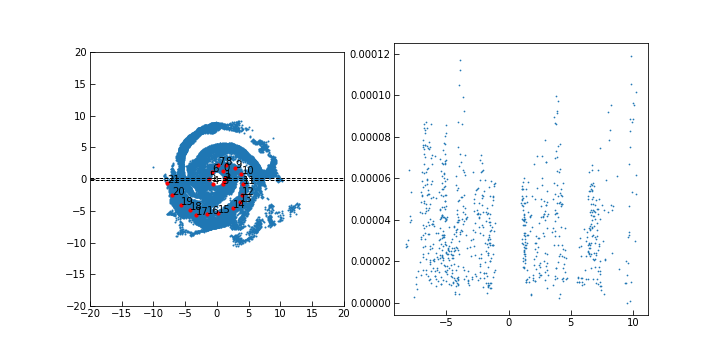

In [19]:
fig, (ax,ax2) = plt.subplots(figsize=(10,5), ncols = 2)
ax.scatter(df.x, df.y, s = 1)
ax.scatter(df_arm1.x, df_arm1.y, s = 10, color = 'red')
for i, row in df_arm1.iterrows():
    ax.text(row.x, row.y, str(int(row.id)))
R = 20
ax.axhline(y=b/2,ls='--',lw=1,color='black')
ax.axhline(y=-b/2,ls='--',lw=1,color='black')
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)

ax2.scatter(Xs_band,prop_band,s=0.5,alpha=1)

ax.set_aspect('equal')

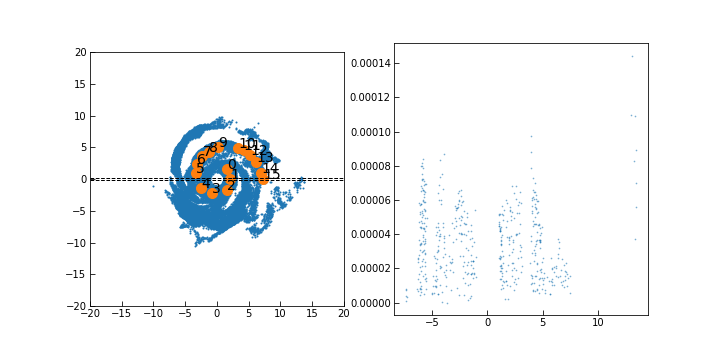

In [20]:
fig, (ax,ax2) = plt.subplots(figsize=(10,5), ncols = 2)
n = 15
ax.scatter(df_arm2.iloc[n].rotation_coords['x_rot'], df_arm2.iloc[n].rotation_coords['y_rot'], s = 1)
ax.scatter(df_arm2.iloc[n].All_tracingPoints_rot['x_rot'], df_arm2.iloc[n].All_tracingPoints_rot['y_rot'], s = 100)

for x, y, id in zip(df_arm2.iloc[n].All_tracingPoints_rot['x_rot'],df_arm2.iloc[n].All_tracingPoints_rot['y_rot'], df_arm2.id):
    ax.text(x, y, str(int(id)), fontsize = 14)

ax.axhline(y=b/2,ls='--',lw=1,color='black')
ax.axhline(y=-b/2,ls='--',lw=1,color='black')
R = 20
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)

ax2.scatter(df_arm2.iloc[n].rotated_arm_profile['x_band'], df_arm2.iloc[n].rotated_arm_profile['y_band'], s = 0.5, alpha = 0.5)

ax.set_aspect('equal')

# Fitting Procedure

In [21]:
df_params = pd.DataFrame({
    'amplitude': [],
    'stderr_amplitude': [],
    'center': [],
    'stderr_center': [],
    'sigma': [],
    'stderr_sigma': [],
    'gamma': [],
    'stderr_gamma': [],
    'x': [],
    'y': [],
    'delta': [],
    'x_tracing': [],
    'y_tracing': [],
    'id_tracing': []
})


In [22]:
#df_params = pd.DataFrame(columns = ['amplitude','stderr_amplitude','center','stderr_center',
                                   # 'sigma','stderr_sigma','gamma','stderr_gamma',
                                   # 'x','y','delta','x_tracing','y_tracing','id_tracing'])

In [23]:
arm = df_arm2.copy(deep=True)

In [24]:
arm

,x,y,arm,id,rotation_info,rotation_coords,alpha,All_tracingPoints_rot,This_tracingPoint_rot,rotated_arm_profile
0,1.946514,0.974234,2,0,"({'x_rot': [0.11028944347822711, 0.12503843148...","{'x_rot': [0.11028944347822711, 0.125038431488...",0.464049,"{'x_rot': [2.1767060190861747, 1.4768177272693...","{'x_rot': 2.1767060190861747, 'y_rot': -2.2204...","{'x_band': [1.1357201600151172, 1.069964544385..."
1,1.992504,-0.681395,2,1,"({'x_rot': [-0.675364568878198, -0.70212813042...","{'x_rot': [-0.675364568878198, -0.702128130427...",5.953674,"{'x_rot': [1.5265488884222833, 2.1057943577311...","{'x_rot': 2.1057943577311584, 'y_rot': 4.44089...","{'x_band': [-1.0391603569522374, -1.0442417401..."
2,1.026720,-2.061086,2,2,"({'x_rot': [-1.0561177458059385, -1.1081998176...","{'x_rot': [-1.0561177458059385, -1.10819981761...",5.174552,"{'x_rot': [-0.004106376521128774, 1.4983373013...","{'x_rot': 2.3026568855865954, 'y_rot': 4.44089...","{'x_band': [-1.0561177458059385, -1.1081998176..."
3,-1.410734,-1.877127,2,3,"({'x_rot': [-0.5696229349636062, -0.6060388261...","{'x_rot': [-0.5696229349636062, -0.60603882612...",4.067904,"{'x_rot': [-1.948252140174058, -0.652357142171...","{'x_rot': 2.348143153393461, 'y_rot': 0.0}","{'x_band': [-1.081550945601702, -1.15754353578..."
4,-2.744435,-0.543426,2,4,"({'x_rot': [0.1738512127899001, 0.173443609102...","{'x_rot': [0.1738512127899001, 0.1734436091027...",3.337074,"{'x_rot': [-2.0986753109163927, -1.82220166992...","{'x_rot': 2.797719855992191, 'y_rot': 5.551115...","{'x_band': [-1.0530871698415705, -1.1067137430..."
5,-2.836415,1.894028,2,5,"({'x_rot': [0.8627837035221926, 0.900706544434...","{'x_rot': [0.8627837035221926, 0.9007065444346...",2.552837,"{'x_rot': [-1.0777665377242007, -2.03542742693...","{'x_rot': 3.4106584397759017, 'y_rot': 2.22044...","{'x_band': [1.0333547163429508, 1.100424875008..."
6,-2.330528,3.227729,2,6,"({'x_rot': [1.0244892404194628, 1.073498904866...","{'x_rot': [1.0244892404194628, 1.0734989048662...",2.196157,"{'x_rot': [-0.3496071962296633, -1.71883364922...","{'x_rot': 3.981155389077257, 'y_rot': 1.110223...","{'x_band': [1.0244892404194628, 1.037044357040..."
7,-1.088806,4.101534,2,7,"({'x_rot': [1.0562989437073116, 1.110264072102...","{'x_rot': [1.0562989437073116, 1.1102640721022...",1.830275,"{'x_rot': [0.4421909997454205, -1.169814053667...","{'x_rot': 4.243592569366909, 'y_rot': 4.440892...","{'x_band': [1.0562989437073116, 1.110264072102..."
8,0.106926,4.469451,2,8,"({'x_rot': [0.9843803983781363, 1.037274132182...","{'x_rot': [0.9843803983781363, 1.0372741321822...",1.546877,"{'x_rot': [1.0205101899414535, -0.633545424663...","{'x_rot': 4.470730196109479, 'y_rot': 4.440892...","{'x_band': [1.1370202715312523, 1.254754884749..."
9,1.716565,4.745390,2,9,"({'x_rot': [0.8071460376027, 0.853688553893386...","{'x_rot': [0.8071460376027, 0.8536885538933862...",1.223707,"{'x_rot': [1.5782677288397151, 0.0370129279592...","{'x_rot': 5.046317359881625, 'y_rot': 0.0}","{'x_band': [1.1029594816012298, 1.167846897656..."


(-2.5, 2.5)

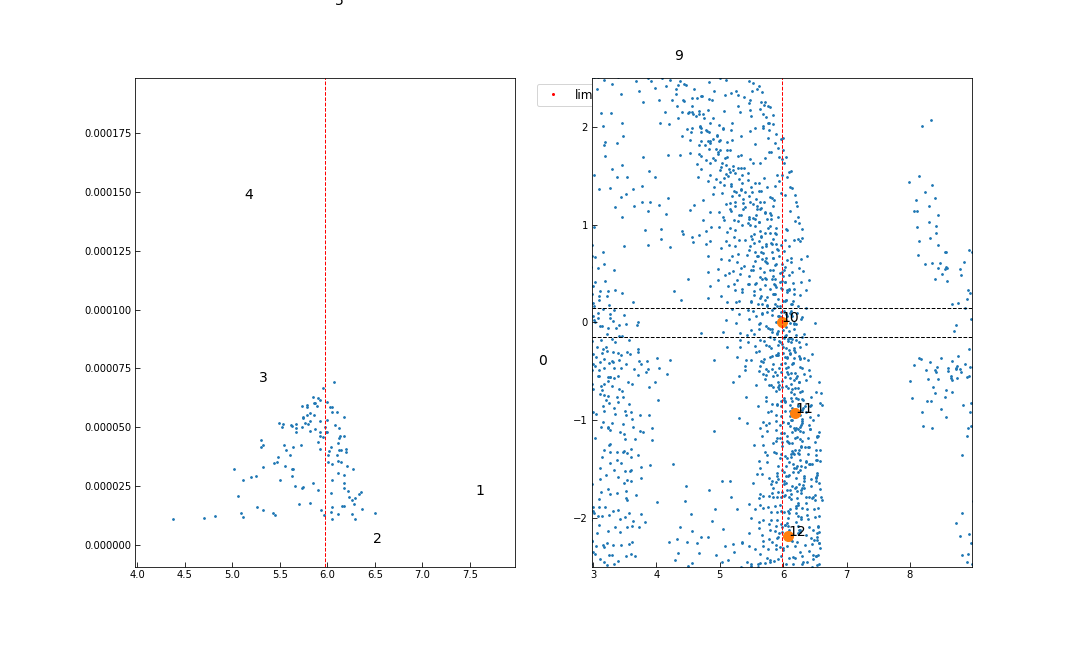

In [25]:
n= 10 #n = 86
fig, (ax,ax2) = plt.subplots(figsize=(15,9), ncols = 2)

x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
y_tracing = arm.iloc[n].This_tracingPoint_rot['y_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--', color = 'red')
x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 3, alpha = 1)
#ax.set_xlim(0,np.max(x_band)+1)
ax.set_xlim(x_tracing-2,x_tracing+2)
klicker = clicker(ax, ["limits"], markers=["o"], colors = ['red'], markersize = 2)
x_tracing_all = arm.iloc[n].All_tracingPoints_rot['x_rot']
y_tracing_all = arm.iloc[n].All_tracingPoints_rot['y_rot']
x_coords = arm.iloc[n].rotation_coords['x_rot']
y_coords = arm.iloc[n].rotation_coords['y_rot']
ax2.scatter(x_coords, y_coords, s = 3)
ax2.scatter(x_tracing_all, y_tracing_all, s = 100)
for x, y, id in zip(x_tracing_all,y_tracing_all, arm.id):
    ax2.text(x, y, str(int(id)), fontsize = 14)
   
ax2.axvline(x = x_tracing, lw = 1, ls = '--', color = 'red')
ax2.axhline(y=b/2,ls='--',lw=1,color='black')
ax2.axhline(y=-b/2,ls='--',lw=1,color='black')
R = 20
ax2.set_xlim(x_tracing-3,x_tracing+3)
ax2.set_ylim(-2.5,2.5)

## %run Routines_and_data/gauss_asym.py

In [26]:
dict_lims = klicker.get_positions()
#print(dict_lims)

In [27]:
dict_lims

{'limits': array([[4.90515567e+00, 1.59626745e-05],
        [5.01029306e+00, 2.65922495e-05],
        [5.12594420e+00, 3.16944455e-05],
        [5.22056785e+00, 3.84973736e-05],
        [5.32570525e+00, 4.40247526e-05],
        [5.40981517e+00, 4.87017656e-05],
        [5.53598004e+00, 5.21032297e-05],
        [5.63060370e+00, 5.55046937e-05],
        [5.68317239e+00, 5.84809747e-05],
        [5.79882353e+00, 6.06068897e-05],
        [5.89344719e+00, 6.27328047e-05],
        [6.06166702e+00, 6.10320727e-05],
        [6.12474946e+00, 5.89061577e-05],
        [6.19834563e+00, 5.25284127e-05],
        [6.21937311e+00, 4.61506676e-05],
        [6.21937311e+00, 4.27492036e-05],
        [6.19834563e+00, 4.01981056e-05],
        [6.24040059e+00, 3.72218246e-05],
        [6.21937311e+00, 3.63714586e-05],
        [6.21937311e+00, 3.46707266e-05],
        [6.27194181e+00, 3.04188965e-05],
        [6.26142807e+00, 2.65922495e-05],
        [6.29296929e+00, 2.44663345e-05],
        [6.33502425e+00,

In [28]:
delta = 0.05
model = get_asym_gaussian_fit(dict_lims,arm,n,delta)

/home/daniel/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


In [29]:
n

10

(0.0, 6.4634569138348e-05)

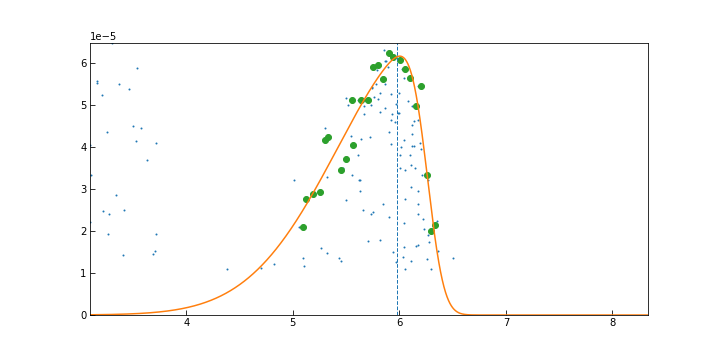

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--')

x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 1, alpha = 1, marker = 'o')

fitted_model = eval_fitted_model(model)
ax.plot(fitted_model['x_eval'], fitted_model['y_eval'], color = 'C1')
ax.scatter(model['x_max'], model['y_max'], color = 'C2', marker = 'o')

ax.set_xlim(np.min(fitted_model['x_eval']), np.max(fitted_model['x_eval']))
ax.set_ylim(np.min(fitted_model['y_eval']), np.max(fitted_model['y_eval'])+0.05*np.max(fitted_model['y_eval']))

In [31]:
fractured = False

In [32]:
model['x_max']

0     5.095938
1     5.119049
2     5.193230
3     5.250736
4     5.299071
5     5.326809
6     5.453289
7     5.500296
8     5.552325
9     5.564430
10    5.638799
11    5.701437
12    5.748665
13    5.801145
14    5.847684
15    5.906036
16    5.938774
17    6.003377
18    6.053816
19    6.100444
20    6.151671
21    6.199406
22    6.255291
23    6.295122
24    6.334483
dtype: float64

In [33]:
list(model['x_max'])

[5.095938183198627,
 5.119048776625851,
 5.193230137742043,
 5.250736322192699,
 5.299070845931341,
 5.32680882292864,
 5.4532887028885915,
 5.500296159713333,
 5.552324846914688,
 5.564430308896377,
 5.638799100763329,
 5.701437271749162,
 5.748665491130529,
 5.801144999832742,
 5.847684071250795,
 5.9060360240871566,
 5.938774023641692,
 6.003376521292228,
 6.053815775319518,
 6.1004440895984215,
 6.151670790652961,
 6.199405601908278,
 6.255291449847992,
 6.295121512935681,
 6.334483164667784]

In [34]:
df_params = add_row_with_param_info(model, df_params, arm.iloc[n], delta, fractured)

/home/daniel/Documentos/UdeA/programas_finales/Routines_and_data/gauss_asym.py:137: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, pd.DataFrame.from_records([dict_values])], ignore_index=True)


In [35]:
df_params.tail()

,amplitude,center,delta,fractured,gamma,id_tracing,sigma,stderr_amplitude,stderr_center,stderr_gamma,stderr_sigma,x,x_tracing,y,y_tracing
0,0.000069,6.262372,0.05,False,-6.766237,10.0,0.838236,0.000003,0.012504,1.430586,0.047692,"[5.095938183198627, 5.119048776625851, 5.19323...",4.705896,"[2.0867398429453386e-05, 2.7499260462807506e-0...",3.687626


In [36]:
df_params

,amplitude,center,delta,fractured,gamma,id_tracing,sigma,stderr_amplitude,stderr_center,stderr_gamma,stderr_sigma,x,x_tracing,y,y_tracing
0,0.000069,6.262372,0.05,False,-6.766237,10.0,0.838236,0.000003,0.012504,1.430586,0.047692,"[5.095938183198627, 5.119048776625851, 5.19323...",4.705896,"[2.0867398429453386e-05, 2.7499260462807506e-0...",3.687626


In [38]:
df_params['y']

0    [2.0867398429453386e-05, 2.7499260462807506e-0...
Name: y, dtype: object

In [39]:
n_actual = df_params.iloc[-1].name
params = df_params.iloc[n_actual]
params

amplitude                                                 6.90948e-05
center                                                        6.26237
delta                                                            0.05
fractured                                                       False
gamma                                                        -6.76624
id_tracing                                                         10
sigma                                                        0.838236
stderr_amplitude                                          2.52619e-06
stderr_center                                               0.0125043
stderr_gamma                                                  1.43059
stderr_sigma                                                0.0476918
x                   [5.095938183198627, 5.119048776625851, 5.19323...
x_tracing                                                      4.7059
y                   [2.0867398429453386e-05, 2.7499260462807506e-0...
y_tracing           

In [40]:
from shapely.geometry import LineString

def find_widths_of_skewed_gaussian_dani(params, dx=0.001):
    # Evaluar el modelo ajustado
    fitted_model = eval_fitted_model_with_given_params(params, dx=dx)
    x_eval = fitted_model['x_eval']
    y_eval = fitted_model['y_eval']

    # Encuentra el máximo
    x_max, y_max = find_maximum(x_eval, y_eval)

    # Generar la línea horizontal en y = y_max / 2
    xs_line = np.arange(np.min(x_eval), np.max(x_eval), 0.01)
    ys_line = np.full(len(xs_line), 0.5 * y_max)

    # Crear LineString para las dos líneas
    first_line = LineString(np.column_stack((x_eval, y_eval)))
    second_line = LineString(np.column_stack((xs_line, ys_line)))
    intersection = first_line.intersection(second_line)

    points_intercept = []

    # Si la intersección es un solo punto
    if intersection.geom_type == 'Point':
        points_intercept = [(intersection.x, intersection.y)]
    # Si la intersección es una colección de puntos
    elif hasattr(intersection, 'geoms'):
        points_intercept = [(point.x, point.y) for point in intersection.geoms]
    # Si no hay intersección
    elif intersection.is_empty:
        return {'x_max': x_max, 'y_max': y_max, 'w1': np.nan, 'w2': np.nan}

    # Asegurarse de que hay suficientes puntos de intersección
    if len(points_intercept) >= 2:
        w1 = x_max - points_intercept[1][0]
        w2 = points_intercept[0][0] - x_max
    else:
        w1, w2 = np.nan, np.nan  # Si no hay suficientes intersecciones

    return {'x_max': x_max, 'y_max': y_max, 'w1': w1, 'w2': w2}

def plot_fit_and_widths_dani(params, ax, dx=0.001):
    width_info = find_widths_of_skewed_gaussian_dani(params, dx=dx)

    dict_eval = eval_fitted_model_with_given_params(params, dx=dx)
    x_eval = dict_eval['x_eval']
    y_eval = dict_eval['y_eval']

    # Plotea la función ajustada
    ax.plot(x_eval, y_eval, lw=2.5, label='Fitted Function')

    # Máximos y anchos
    ax.axvline(x=width_info['x_max'], color='red', lw=1.5, label='x_max = {:.3f}'.format(width_info['x_max']))
    ax.axhline(y=width_info['y_max'], ls='--', color='k', label='y_max = {:.2e}'.format(width_info['y_max']))
    ax.axhline(y=0.5 * width_info['y_max'], color='green', lw=1.5, label='y_max / 2 = {:.2e}'.format(0.5 * width_info['y_max']))

    # Líneas verticales para w1 y w2
    ax.axvline(x=np.abs(width_info['x_max'] - width_info['w1']), color='magenta', lw=1.5, ls='--', label='w1 = {:.3f}'.format(width_info['w1']))
    ax.axvline(x=np.abs(width_info['x_max'] + width_info['w2']), color='purple', lw=1.5, ls='--', label='w2 = {:.3f}'.format(width_info['w2']))

    # Ajustar etiquetas de los ticks
    xt = ax.get_xticks()
    tick1 = '{:.2f}'.format(np.abs(width_info['x_max'] - width_info['w1']))
    tick2 = '{:.2f}'.format(np.abs(width_info['x_max'] + width_info['w2']))
    xt = np.append(xt, [float(tick1), float(tick2)])

    ax.set_xticks(xt)
    ax.set_xticklabels(xt)

    ax.grid(alpha=0.5, lw=1, ls='--')
    ax.legend(loc='upper left')



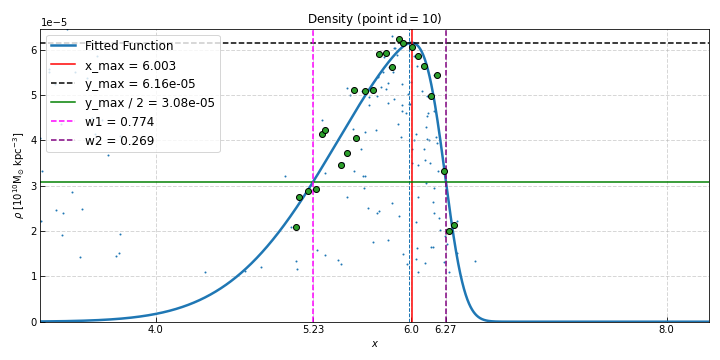

In [41]:
n_actual = df_params.iloc[-1].name
params = df_params.iloc[n_actual]
fig, ax = plt.subplots(figsize=(10,5))
x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--')

x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 1, alpha = 1)

fitted_model = eval_fitted_model(model)
ax.scatter(model['x_max'], model['y_max'], color = 'C2', marker = 'o',  linewidths = 1, edgecolors = 'k', zorder = 10)

ax.set_xlim(0,np.max(x_band)+1)
plot_fit_and_widths_dani(params, ax)
ax.set_xlim(np.min(fitted_model['x_eval']), np.max(fitted_model['x_eval']))
ax.set_ylim(np.min(fitted_model['y_eval']), np.max(fitted_model['y_eval'])+0.05*np.max(fitted_model['y_eval']))

ax.set_xlabel(r'$x$')
rho_units      = r"$ \rho \ [10^{10} \mathrm{M}_{\odot} \ \mathrm{kpc}^{-3}] $"
ax.set_ylabel(rho_units)
ax.set_title(r'$\mathrm{{Density}} \ (\mathrm{{point \ id}}={{{0}}})$'.format(arm.iloc[n].id))
fig.tight_layout()
fig.savefig('fit_plots/rho_point_id_{}_arm2.png'.format(arm.iloc[n].id),dpi=200)

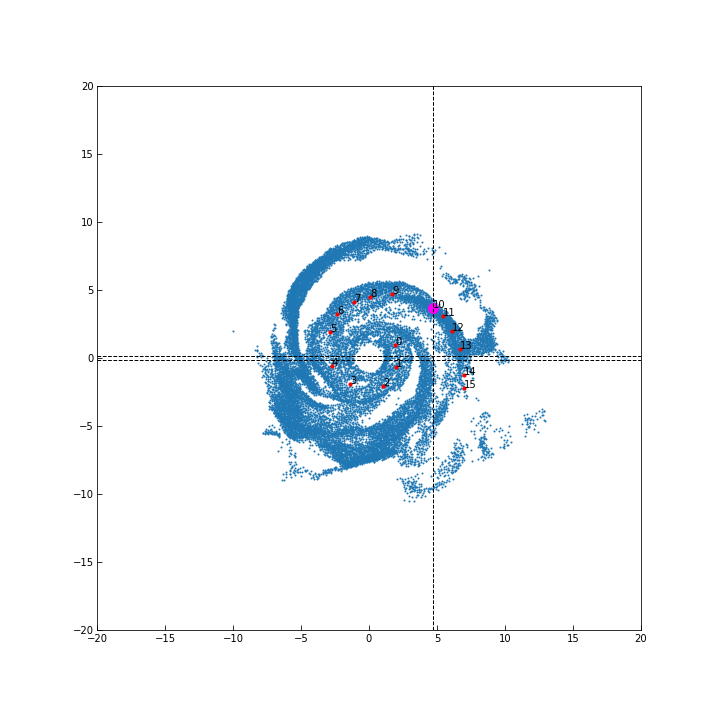

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.x, df.y, s = 1)
ax.scatter(df_arm2.x, df_arm2.y, s = 10, color = 'red')
ax.scatter(df_params.iloc[n_actual].x_tracing,df_params.iloc[n_actual].y_tracing,color='magenta',s = 100)
ax.axvline(x=df_params.iloc[n_actual].x_tracing,ls='--',lw=1,color='black')

for i, row in df_arm2.iterrows():
    ax.text(row.x, row.y, str(int(row.id)))
R = 20
ax.axhline(y=b/2,ls='--',lw=1,color='black')
ax.axhline(y=-b/2,ls='--',lw=1,color='black')
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)

ax.set_aspect('equal')

In [43]:
df_params.to_csv('fit_info/fit_params_rho_arm2_adicionales_dani.csv', index = False)

In [44]:
df_params.to_csv('df_params_rho_arm2_adicionales_dani.csv')

## arm 1

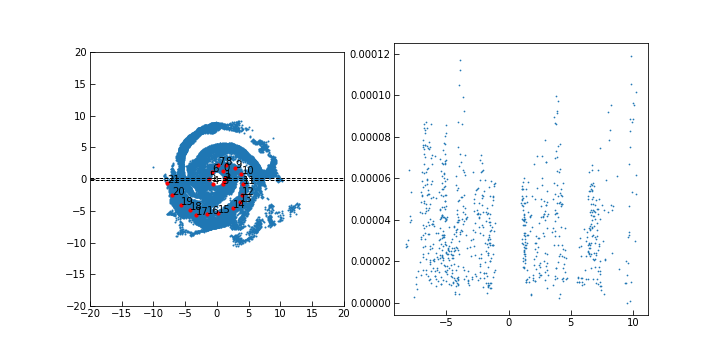

In [45]:
fig, (ax,ax2) = plt.subplots(figsize=(10,5), ncols = 2)
ax.scatter(df.x, df.y, s = 1)
ax.scatter(df_arm1.x, df_arm1.y, s = 10, color = 'red')
for i, row in df_arm1.iterrows():
    ax.text(row.x, row.y, str(int(row.id)))
R = 20
ax.axhline(y=b/2,ls='--',lw=1,color='black')
ax.axhline(y=-b/2,ls='--',lw=1,color='black')
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)

ax2.scatter(Xs_band,prop_band,s=0.5,alpha=1)

ax.set_aspect('equal')

In [46]:
df_params = pd.DataFrame({
    'amplitude': [],
    'stderr_amplitude': [],
    'center': [],
    'stderr_center': [],
    'sigma': [],
    'stderr_sigma': [],
    'gamma': [],
    'stderr_gamma': [],
    'x': [],
    'y': [],
    'delta': [],
    'x_tracing': [],
    'y_tracing': [],
    'id_tracing': []
})

arm = df_arm1.copy(deep=True)

In [47]:
arm

,x,y,arm,id,rotation_info,rotation_coords,alpha,All_tracingPoints_rot,This_tracingPoint_rot,rotated_arm_profile
0,1.026720,1.204183,1,0,"({'x_rot': [0.5134524934367134, 0.547338895984...","{'x_rot': [0.5134524934367134, 0.5473388959846...",0.864779,"{'x_rot': [1.58246962545044, 1.026586109519927...","{'x_rot': 1.58246962545044, 'y_rot': 1.1102230...","{'x_band': [1.1600123444345778, 1.256597473349..."
1,1.302658,0.238399,1,1,"({'x_rot': [-0.1889922481457993, -0.1893677728...","{'x_rot': [-0.1889922481457993, -0.18936777280...",0.181007,"{'x_rot': [1.2267232918910906, 1.3242932183347...","{'x_rot': 1.3242932183347278, 'y_rot': 2.77555...","{'x_band': [1.0539995096965695, 1.106438289934..."
2,1.210679,-0.313477,1,2,"({'x_rot': [-0.6110907756248722, -0.6341996990...","{'x_rot': [-0.6110907756248722, -0.63419969909...",6.029823,"{'x_rot': [0.6921007760706643, 1.2013135961822...","{'x_rot': 1.2506043266241258, 'y_rot': 1.66533...","{'x_band': [-1.020251969274602, -1.02988037637..."
3,0.934741,-0.773374,1,3,"({'x_rot': [-0.9215298476257523, -0.9632003571...","{'x_rot': [-0.9215298476257523, -0.96320035712...",5.591978,"{'x_rot': [0.023436371010781998, 0.85169640367...","{'x_rot': 1.213197335803762, 'y_rot': 2.220446...","{'x_band': [-1.0480670411849646, -1.1050015463..."
4,-0.628909,-0.727385,1,4,"({'x_rot': [-0.5070274241896131, -0.5406219479...","{'x_rot': [-0.5070274241896131, -0.54062194797...",3.999470,"{'x_rot': [-1.5824319412236145, -1.03233509806...","{'x_rot': 0.9615690268232215, 'y_rot': 5.55111...","{'x_band': [-1.1600154088553523, -1.2574309890..."
5,-1.180786,0.054440,1,5,"({'x_rot': [0.41933621014188976, 0.43188226227...","{'x_rot': [0.41933621014188976, 0.431882262272...",3.095520,"{'x_rot': [-0.9701703836235571, -1.29029612173...","{'x_rot': 1.1820398273394643, 'y_rot': 2.08166...","{'x_band': [-1.0394145101545735, -1.0719467098..."
6,-0.766878,1.112203,1,6,"({'x_rot': [1.030292026476847, 1.0797876138291...","{'x_rot': [1.030292026476847, 1.07978761382913...",2.174449,"{'x_rot': [0.4085435971895237, -0.543192097770...","{'x_rot': 1.350962076276743, 'y_rot': 5.551115...","{'x_band': [1.030292026476847, 1.0797876138291..."
7,0.152916,2.169966,1,7,"({'x_rot': [0.9648626735274539, 1.017171301876...","{'x_rot': [0.9648626735274539, 1.0171713018769...",1.500443,"{'x_rot': [1.2733770577189918, 0.3293795284683...","{'x_rot': 2.1753476784658026, 'y_rot': 0.0}","{'x_band': [1.1489033781125273, 1.248400267589..."
8,1.394638,2.169966,1,8,"({'x_rot': [0.6336693093908949, 0.672916240541...","{'x_rot': [0.6336693093908949, 0.6729162405416...",0.999570,"{'x_rot': [1.5681156374352012, 0.9048510406592...","{'x_rot': 2.579489937019059, 'y_rot': 0.0}","{'x_band': [1.0958562258377271, 1.148892726846..."
9,2.912298,1.802049,1,9,"({'x_rot': [0.20480852093502178, 0.22417937406...","{'x_rot': [0.20480852093502178, 0.224179374066...",0.554108,"{'x_rot': [1.5067150957322908, 1.2331834839086...","{'x_rot': 3.4247419757616777, 'y_rot': 2.22044...","{'x_band': [1.1315903376233507, 1.091270754207..."


(-2.5, 2.5)

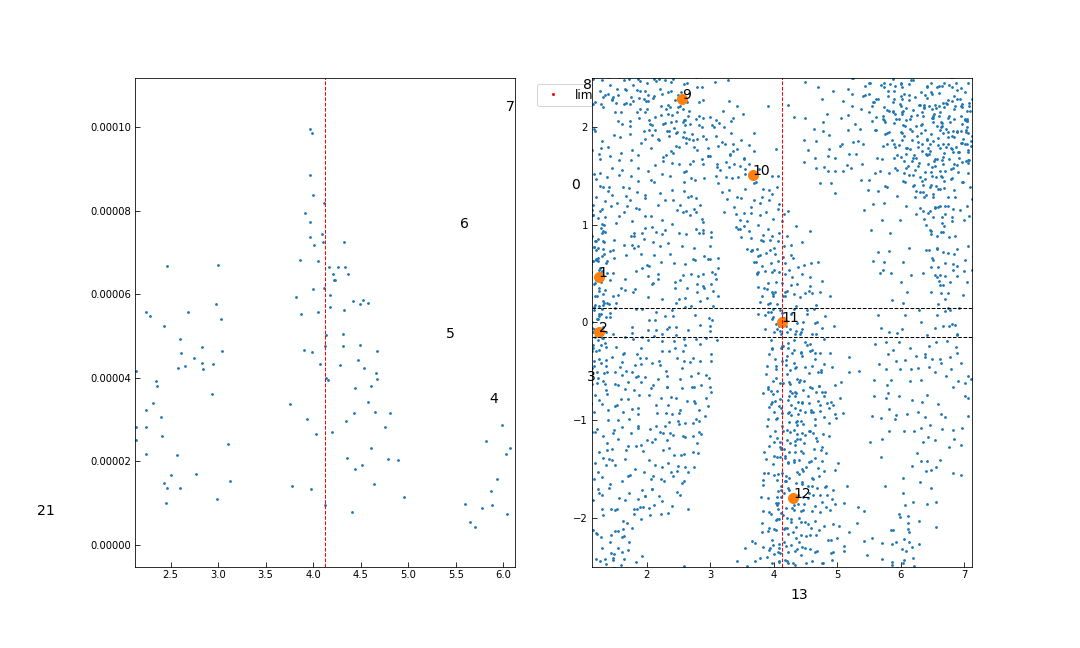

In [51]:
n= 11 #n = 86
fig, (ax,ax2) = plt.subplots(figsize=(15,9), ncols = 2)

x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
y_tracing = arm.iloc[n].This_tracingPoint_rot['y_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--', color = 'red')
x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 3, alpha = 1)
#ax.set_xlim(0,np.max(x_band)+1)
ax.set_xlim(x_tracing-2,x_tracing+2)
klicker = clicker(ax, ["limits"], markers=["o"], colors = ['red'], markersize = 2)
x_tracing_all = arm.iloc[n].All_tracingPoints_rot['x_rot']
y_tracing_all = arm.iloc[n].All_tracingPoints_rot['y_rot']
x_coords = arm.iloc[n].rotation_coords['x_rot']
y_coords = arm.iloc[n].rotation_coords['y_rot']
ax2.scatter(x_coords, y_coords, s = 3)
ax2.scatter(x_tracing_all, y_tracing_all, s = 100)
for x, y, id in zip(x_tracing_all,y_tracing_all, arm.id):
    ax2.text(x, y, str(int(id)), fontsize = 14)
   
ax2.axvline(x = x_tracing, lw = 1, ls = '--', color = 'red')
ax2.axhline(y=b/2,ls='--',lw=1,color='black')
ax2.axhline(y=-b/2,ls='--',lw=1,color='black')
R = 20
ax2.set_xlim(x_tracing-3,x_tracing+3)
ax2.set_ylim(-2.5,2.5)

In [52]:
dict_lims = klicker.get_positions()
#print(dict_lims)

In [53]:
delta = 0.05
model = get_asym_gaussian_fit(dict_lims,arm,n,delta)

/home/daniel/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


(0.0, 7.473503757481085e-05)

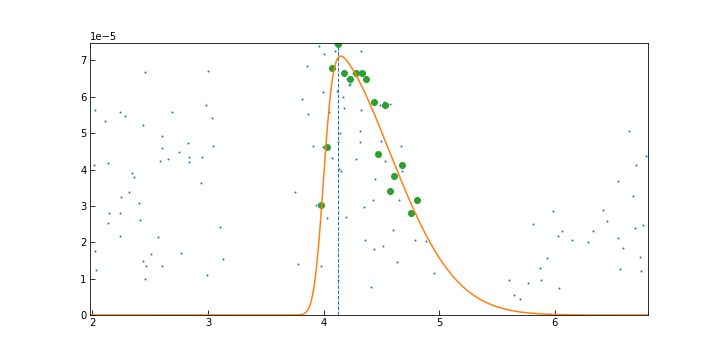

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--')

x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 1, alpha = 1, marker = 'o')

fitted_model = eval_fitted_model(model)
ax.plot(fitted_model['x_eval'], fitted_model['y_eval'], color = 'C1')
ax.scatter(model['x_max'], model['y_max'], color = 'C2', marker = 'o')

ax.set_xlim(np.min(fitted_model['x_eval']), np.max(fitted_model['x_eval']))
ax.set_ylim(np.min(fitted_model['y_eval']), np.max(fitted_model['y_eval'])+0.05*np.max(fitted_model['y_eval']))

In [55]:
fractured = False

df_params = add_row_with_param_info(model, df_params, arm.iloc[n], delta, fractured)

/home/daniel/Documentos/UdeA/programas_finales/Routines_and_data/gauss_asym.py:137: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, pd.DataFrame.from_records([dict_values])], ignore_index=True)


In [56]:
n_actual = df_params.iloc[-1].name
params = df_params.iloc[n_actual]
params

amplitude                                                 5.30405e-05
center                                                         3.9998
delta                                                            0.05
fractured                                                       False
gamma                                                         8.62732
id_tracing                                                         11
sigma                                                        0.567687
stderr_amplitude                                          2.53639e-06
stderr_center                                               0.0104848
stderr_gamma                                                  2.69985
stderr_sigma                                                0.0403235
x                   [3.978859952773209, 4.03175169570319, 4.076452...
x_tracing                                                     4.06204
y                   [3.0209795581740124e-05, 4.617662749779218e-05...
y_tracing           

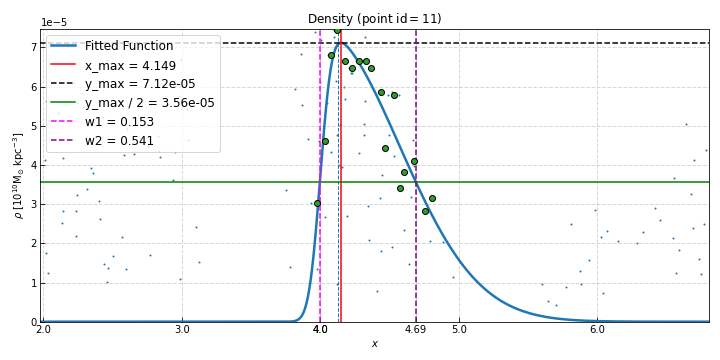

In [57]:
n_actual = df_params.iloc[-1].name
params = df_params.iloc[n_actual]
fig, ax = plt.subplots(figsize=(10,5))
x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--')

x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 1, alpha = 1)

fitted_model = eval_fitted_model(model)
ax.scatter(model['x_max'], model['y_max'], color = 'C2', marker = 'o',  linewidths = 1, edgecolors = 'k', zorder = 10)

ax.set_xlim(0,np.max(x_band)+1)
plot_fit_and_widths_dani(params, ax)
ax.set_xlim(np.min(fitted_model['x_eval']), np.max(fitted_model['x_eval']))
ax.set_ylim(np.min(fitted_model['y_eval']), np.max(fitted_model['y_eval'])+0.05*np.max(fitted_model['y_eval']))

ax.set_xlabel(r'$x$')
rho_units      = r"$ \rho \ [10^{10} \mathrm{M}_{\odot} \ \mathrm{kpc}^{-3}] $"
ax.set_ylabel(rho_units)
ax.set_title(r'$\mathrm{{Density}} \ (\mathrm{{point \ id}}={{{0}}})$'.format(arm.iloc[n].id))
fig.tight_layout()
fig.savefig('fit_plots/rho_point_id_{}_arm2.png'.format(arm.iloc[n].id),dpi=200)

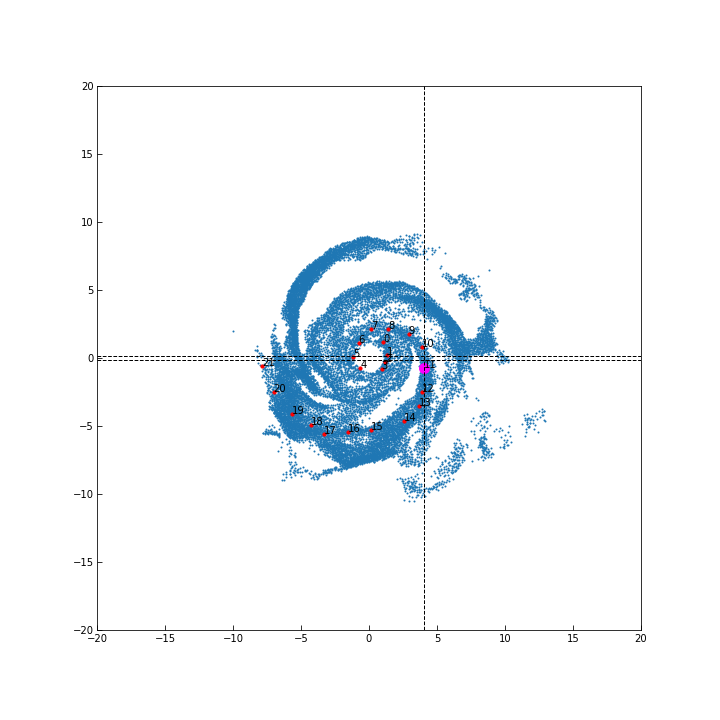

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.x, df.y, s = 1)
ax.scatter(df_arm1.x, df_arm1.y, s = 10, color = 'red')
ax.scatter(df_params.iloc[n_actual].x_tracing,df_params.iloc[n_actual].y_tracing,color='magenta',s = 100)
ax.axvline(x=df_params.iloc[n_actual].x_tracing,ls='--',lw=1,color='black')

for i, row in df_arm1.iterrows():
    ax.text(row.x, row.y, str(int(row.id)))
R = 20
ax.axhline(y=b/2,ls='--',lw=1,color='black')
ax.axhline(y=-b/2,ls='--',lw=1,color='black')
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)

ax.set_aspect('equal')

In [61]:
df_params.to_csv('fit_info/fit_params_rho_arm1_adicionales_dani.csv', index = False)